# Potatoe Diseases Classification with CNN

The disease of potatoes can be detected throught the spot on their leaves. Dataset with 3 categories which are healthy leaf, early blight and late blight diseases are provided in: https://www.kaggle.com/datasets/arjuntejaswi/plant-village.

For early observation, it will be utilized only 450 datasets.

## 1. Create 552 sample dataset
The healthy leaves only available 152 pictures. The rest are full 200 pictures for each diseases.

In [1]:
import os, random, shutil

src = "C:/Users/ekadw/Documents/DATA/Leaf_Disease/potato"
dest = "C:/Users/ekadw/Documents/DATA/Leaf_Disease/potato_small"
n_per_class = 200  # adjust if you want fewer/more

os.makedirs(dest, exist_ok=True)
for cls in os.listdir(src):
    cls_src = os.path.join(src, cls)
    cls_dest = os.path.join(dest, cls)
    os.makedirs(cls_dest, exist_ok=True)
    images = os.listdir(cls_src)
    random.shuffle(images)
    selected = images[:n_per_class]
    print(f"{cls}: copying {len(selected)} images.")
    for img in selected:
        shutil.copy(os.path.join(cls_src, img), os.path.join(cls_dest, img))


Potato___Early_blight: copying 200 images.
Potato___healthy: copying 152 images.
Potato___Late_blight: copying 200 images.


## 2. Load the selected dataset into TensowFlow

In [3]:
import tensorflow as tf

IMG_SIZE = (128, 128)
BATCH_SIZE = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)


Found 779 files belonging to 3 classes.
Using 624 files for training.
Found 779 files belonging to 3 classes.
Using 155 files for validation.
Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)
class_names = train_ds.class_names
num_classes = len(class_names)


Found 779 files belonging to 3 classes.
Using 624 files for training.


## 3. Create simple CNN model

In [5]:
from tensorflow.keras import layers, models

def make_simple_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

num_classes = len(train_ds.class_names)
model = make_simple_cnn(IMG_SIZE + (3,), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the CNN model

In [6]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.4152 - loss: 106.3733 - val_accuracy: 0.6710 - val_loss: 0.6738
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.7243 - loss: 0.6775 - val_accuracy: 0.6968 - val_loss: 0.7144
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.7419 - loss: 0.5662 - val_accuracy: 0.7742 - val_loss: 0.5830
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8183 - loss: 0.4125 - val_accuracy: 0.7613 - val_loss: 0.6424
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8401 - loss: 0.3795 - val_accuracy: 0.7935 - val_loss: 0.5907
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8800 - loss: 0.2927 - val_accuracy: 0.7742 - val_loss: 0.6788
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8684 - loss: 0.3740 - val_accuracy: 0.7355 - val_loss: 0.5582
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.8935 - loss: 0.2948 - val_accuracy: 0.

## 5. Evaluate the CNN model

In [7]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.3f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7462 - loss: 0.5692
Validation accuracy: 0.781


## 6. Plot the learning curve

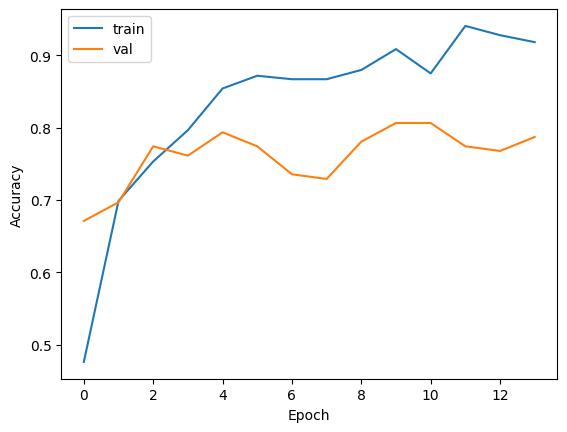

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


## 7. Make predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


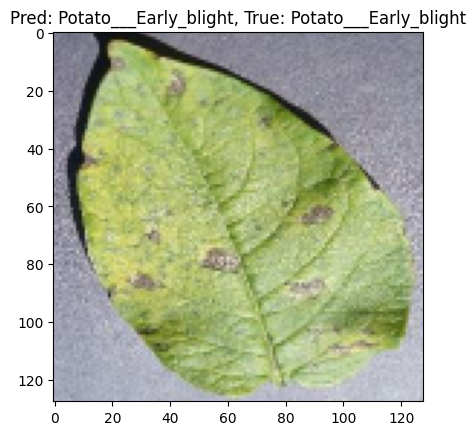

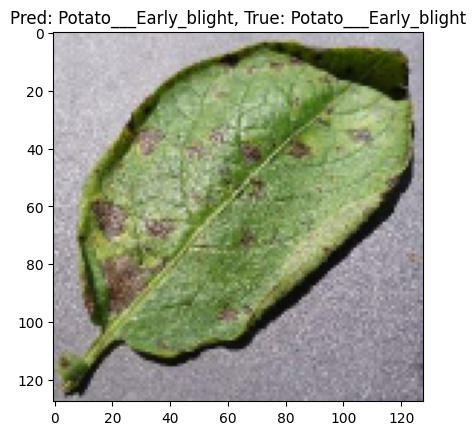

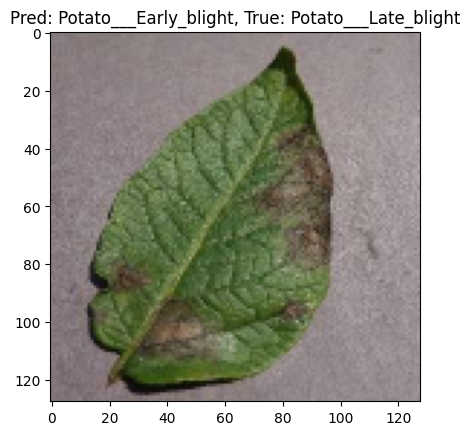

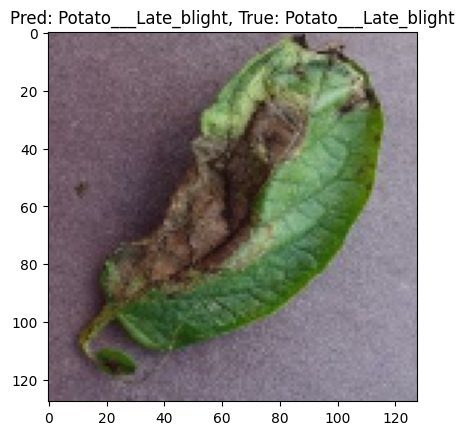

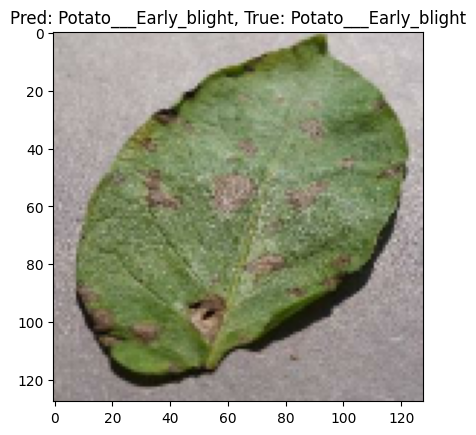

In [9]:
import numpy as np

class_names = train_ds.class_names

for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[np.argmax(preds[i])]}, True: {class_names[np.argmax(labels[i])]}")
        plt.show()


## 8. Conclusion
This is the early step of creating the classification model. For more advance approaches, there are some steps can be considered:
a. Add more dataset.
b. Add data augmentation. Primarily into the healthy dataset since the number of data available only 152.
c. Optimize the number of layers and the number of neuron for each layer.
d. Use the pre trained model.